In [1]:
from subpred.protein_go_datasets import get_transmembrane_transporter_dataset, get_stats

In [2]:
import pandas as pd
pd.set_option('display.max_rows', 100)

## Parameters

In [3]:
ORGANISMS = [9606]  # athaliana 3702 yeast 559292 human 9606 ecoli 83333
GO_TERMS_CLASSES = [
    "monosaccharide transmembrane transporter activity",
    "amino acid:monoatomic cation symporter activity",
]
IDENTITY_THRESHOLD = 70
TEST_NAME = "svc_human_sugaramino"
# TODO pathlib
FEATURES_FOLDER = "../data/tmp_data/"  # to share between environments
RESULTS_FOLDER = "../data/results/"
RECALCULATE_RESULTS = True  # TODO If false, use cached results, e.g. to create more plots

## Full dataset

In [4]:
# Get full dataset for stats. Dataset for analysis is created in cell below.
dataset_unfiltered = get_transmembrane_transporter_dataset( 
    organism_ids=ORGANISMS,
    swissprot_only=False,
    datasets_path="../data/datasets/",
    exclude_iea_go_terms=False,
    max_sequence_evidence_code=2,
    remove_proteins_without_gene_names=False,
)
get_stats(*dataset_unfiltered)

cd-hit: clustered 3874 sequences into 1029 clusters at threshold 50
cd-hit: clustered 3874 sequences into 1347 clusters at threshold 70
cd-hit: clustered 3874 sequences into 1774 clusters at threshold 90
cd-hit: clustered 3874 sequences into 3408 clusters at threshold 100


n_transporters  \
swissprot_reviewed has_gene_name go_evidence   protein_existence_evidence clustering                   
False              False         computational protein_level              50                       1   
                                                                          70                       1   
                                                                          90                       5   
                                                                          100                      9   
                                                                          None                    10   
                                               transcript_level           50                      54   
                                                                          70                      77   
                                                                          90                     152   
                                                                          100                    665   
                                                                          None                   771   
                                 experiment    transcript_level           50                       1   
                                                                          70                       1   
                                                                          90                       1   
                                                                          100                      2   
                                                                          None                     2   
                   True          computational protein_level              50                     142   
                                                                          70                     211   
                                                                          90                     419   
                                                                          100                   1031   
                                                                          None                  1175   
                                               transcript_level           50                      31   
                                                                          70                      46   
                                                                          90                     100   
                                                                          100                    501   
                                                                          None                   687   
                                 experiment    transcript_level           50                       1   
                                                                          70                       1   
                                                                          90                       2   
                                                                          100                      4   
                                                                          None                     5   
True               True          computational protein_level              50                     552   
                                                                          70                     741   
                                                                          90                     819   
                                                                          100                    919   
                                                                          None                   945   
                                               transcript_level           50                       6   
                                                                          70                      10   
                              

## Filtered Subset

In [5]:
dataset_organism = get_transmembrane_transporter_dataset(  # organism
    organism_ids=ORGANISMS,
    swissprot_only=True,
    datasets_path="../data/datasets/",
    exclude_iea_go_terms=True,
    max_sequence_evidence_code=1,
    remove_proteins_without_gene_names=True,
)
get_stats(*dataset_organism)

cd-hit: clustered 1121 sequences into 846 clusters at threshold 50
cd-hit: clustered 1121 sequences into 1039 clusters at threshold 70
cd-hit: clustered 1121 sequences into 1110 clusters at threshold 90
cd-hit: clustered 1121 sequences into 1118 clusters at threshold 100


n_transporters  \
swissprot_reviewed has_gene_name go_evidence protein_existence_evidence clustering                   
True               True          experiment  protein_level              50                     846   
                                                                        70                    1039   
                                                                        90                    1110   
                                                                        100                   1118   
                                                                        None                  1121   

                                                                                    n_terms  
swissprot_reviewed has_gene_name go_evidence protein_existence_evidence clustering           
True               True          experiment  protein_level              50              534  
                                                                        70              563  
                                                                        90              570  
                                                                        100             570  
                                                                        None            570

In [6]:
from subpred.protein_go_datasets import count_children
count_children(dataset_organism[1],"amino acid transmembrane transporter activity")

,Uniprot
go_term_ancestor,
amino acid transmembrane transporter activity,96
L-amino acid transmembrane transporter activity,59
neutral L-amino acid transmembrane transporter activity,39
amino acid:monoatomic cation symporter activity,27
basic amino acid transmembrane transporter activity,19
acidic amino acid transmembrane transporter activity,18
glutamate-gated receptor activity,17
gamma-aminobutyric acid transmembrane transporter activity,8
amino acid:monoatomic cation antiporter activity,5


In [7]:
count_children(dataset_organism[1],"sugar transmembrane transporter activity")

,Uniprot
go_term_ancestor,
sugar transmembrane transporter activity,26
monosaccharide transmembrane transporter activity,24


## Sugar/Amino subset

In [8]:
from subpred.dataset_filters import get_classification_subset
dataset_organism = get_classification_subset(dataset_full=dataset_organism, go_terms=GO_TERMS_CLASSES)

print("before clustering:")
dataset_organism[1].go_term_ancestor.value_counts()

before clustering:


go_term_ancestor
amino acid:monoatomic cation symporter activity      27
monosaccharide transmembrane transporter activity    24
Name: count, dtype: int64

In [9]:
from subpred.dataset_filters import filter_no_3Di_available

dataset_organism = filter_no_3Di_available(dataset_organism)
dataset_organism[1].go_term_ancestor.value_counts()

go_term_ancestor
amino acid:monoatomic cation symporter activity      27
monosaccharide transmembrane transporter activity    23
Name: count, dtype: int64

Clustering at 70%

In [10]:
from subpred.dataset_filters import cluster_sequences
dataset_organism = cluster_sequences(dataset_full=dataset_organism, identity_threshold=IDENTITY_THRESHOLD)
dataset_organism[1].go_term_ancestor.value_counts()

cd-hit: clustered 50 sequences into 47 clusters at threshold 70


go_term_ancestor
amino acid:monoatomic cation symporter activity      25
monosaccharide transmembrane transporter activity    22
Name: count, dtype: int64

## Family annotations

In [11]:
from subpred.protein_go_datasets import count_interpro_annotations, get_interpro_table

count_interpro_annotations(dataset_organism[1], GO_TERMS_CLASSES)

######## monosaccharide transmembrane transporter activity ########
Family
Major facilitator, sugar transporter-like              12
Sugar/inositol transporter                             12
Glucose transporter GLUT                                8
Sodium/solute symporter                                 6
Major Facilitator Superfamily Sugar Transporter         2
Major Facilitator Superfamily Trehalose Transporter     2
Nucleobase cation symporter 2 family                    2
Chemokine beta/gamma/delta                              1
CXC chemokine                                           1
Glucose transporter, type 2 (GLUT2)                     1
Glucose transporter, type 1 (GLUT1)                     1
Glucose transporter, type 4 (GLUT4)                     1
Fructose transporter, type 5 (GLUT5)                    1
Glucose transporter, type 3 (GLUT3)                     1
Sodium/myo-inositol cotransporter SMIT                  1
Xanthine/uracil permease                               

## Feature generation

In [12]:
from subpred.features import get_features
features_list, series_labels = get_features(dataset_full=dataset_organism)

2025-06-04 13:55:02.028084: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-04 13:55:02.075578: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749038102.084253   12162 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749038102.087500   12162 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-04 13:55:02.140027: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

MRAVLDTADIAIVALYFILVMCIGFFAMWKSNRSTVSGYFLAGRSMTWVAIGASLFVSNIGSEHFIGLAGSGAASGFAVGAWEFNALLLLQLLGWVFIPIYIRSGVYTMPEYLSKRFGGHRIQVYFAALSLILYIFTKLSVDLYSGALFIQESLGWNLYVSVILLIGMTALLTVTGGLVAVIYTDTLQALLMIIGALTLMIISIMEIGGFEEVKRRYMLASPDVTSILLTYNLSNTNSCNVSPKKEALKMLRNPTDEDVPWPGFILGQTPASVWYWCADQVIVQRVLAAKNIAHAKGSTLMAGFLKLLPMFIIVVPGMISRILFTDDIACINPEHCMLVCGSRAGCSNIAYPRLVMKLVPVGLRGLMMAVMIAALMSDLDSIFNSASTIFTLDVYKLIRKSASSRELMIVGRIFVAFMVVISIAWVPIIVEMQGGQMYLYIQEVADYLTPPVAALFLLAIFWKRCNEQGAFYGGMAGFVLGAVRLILAFAYRAPECDQPDNRPGFIKDIHYMYVATGLFWVTGLITVIVSLLTPPPTKEQIRTTTFWSKKNLVVKENCSPKEEPYQMQEKSILRCSENNETINHIIPNGKSEDSIKGLQPEDVNLLVTCREEGNPVASLGHSEAETPVDAYSNGQAALMGEKERKKETDDGGRYWKFIDWFCGFKSKSLSKRSLRDLMEEEAVCLQMLEETRQVKVILNIGLFAVCSLGIFMFVYFSL
MRAVLDTADIAIVALYFILVMCIGFFAMWKSNRSTVSGYFLAGRSMTWVAIGASLFVSNIGSEHFIGLAGSGAASGFAVGAWEFNALLLLQLLGWVFIPIYIRSGVYTMPEYLSKRFGGHRIQVYFAALSLILYIFTKLSVDLYSGALFIQESLGWNLYVSVILLIGMTALLTVTGGLVAVIYTDTLQALLMIIGALTLMIISIMEIGGFEEVKRRYMLASPDVTSILLTYNLSNTNSCNVSPKKEALKMLRNPTDEDVPWPGFILGQTPASVWYWCADQV

For each Feature: Outlier detection, numpy conversion 

In [13]:
from subpred.features import get_ml_datasets
ml_datasets = list(get_ml_datasets(features_list=features_list, series_labels=series_labels))
ml_datasets

[Name: DUMMY, Features: 1024, Samples: 47, Classes: [0 1], Labels: ['amino acid:monoatomic cation symporter activity'
  'monosaccharide transmembrane transporter activity']),
 Name: AAC, Features: 20, Samples: 47, Classes: [0 1], Labels: ['amino acid:monoatomic cation symporter activity'
  'monosaccharide transmembrane transporter activity']),
 Name: PAAC, Features: 400, Samples: 47, Classes: [0 1], Labels: ['amino acid:monoatomic cation symporter activity'
  'monosaccharide transmembrane transporter activity']),
 Name: AA_KMER3, Features: 8000, Samples: 47, Classes: [0 1], Labels: ['amino acid:monoatomic cation symporter activity'
  'monosaccharide transmembrane transporter activity']),
 Name: 3Di_COMP, Features: 20, Samples: 47, Classes: [0 1], Labels: ['amino acid:monoatomic cation symporter activity'
  'monosaccharide transmembrane transporter activity']),
 Name: 3Di_KMER2, Features: 400, Samples: 47, Classes: [0 1], Labels: ['amino acid:monoatomic cation symporter activity'
  'mon

In [14]:
# saving as pickle, to load in different notebook with different env, 
# as tensorflow on GPU has problems with current CUDA version (too new)
import pickle
with open(f"{FEATURES_FOLDER}{TEST_NAME}_ml_data.pickle", 'wb') as handle:
    pickle.dump(ml_datasets, handle)

## Outliers

In [15]:
from subpred.evaluation import outlier_check

outlier_check(dataset_full=dataset_organism,ml_datasets=ml_datasets, threshold=0.5)

,outlier_count,protein_names,go_term_ancestor
Uniprot,,,


## Model evaluation SVM

In [16]:
ml_datasets[0]

Name: DUMMY, Features: 1024, Samples: 47, Classes: [0 1], Labels: ['amino acid:monoatomic cation symporter activity'
 'monosaccharide transmembrane transporter activity'])

In [17]:
from subpred.evaluation import get_svm_results, plot_results_long, summarize_results_long
from sklearn.metrics import f1_score, make_scorer

scoring_outer = {
    "Balanced Accuracy": "balanced_accuracy",
    "F1 Macro": "f1_macro",
    "F1 Amino Acid Symporter": make_scorer(
        f1_score, pos_label=0
    ),  # labels are encoded in lex. order
    "F1 Sugar": make_scorer(f1_score, pos_label=1),
}

df_results_long = get_svm_results(
    ml_datasets=ml_datasets,
    recalculate=RECALCULATE_RESULTS,
    output_folder=RESULTS_FOLDER,
    test_name=TEST_NAME,
    inner_cv=5,
    outer_cv=5,
    repeats=5,
    n_jobs_inner=1,
    n_jobs_outer=-1,
    scoring_inner="balanced_accuracy",
    scoring_outer=scoring_outer,
)

=== DUMMY ===
Balanced Accuracy: 0.42+-0.14
F1 Macro: 0.40+-0.14
F1 Amino Acid Symporter: 0.45+-0.17
F1 Sugar: 0.35+-0.19
=== AAC ===
Balanced Accuracy: 0.81+-0.15
F1 Macro: 0.81+-0.15
F1 Amino Acid Symporter: 0.82+-0.15
F1 Sugar: 0.79+-0.17
=== PAAC ===
Balanced Accuracy: 0.90+-0.11
F1 Macro: 0.89+-0.11
F1 Amino Acid Symporter: 0.92+-0.08
F1 Sugar: 0.87+-0.13
=== AA_KMER3 ===
Balanced Accuracy: 0.89+-0.09
F1 Macro: 0.88+-0.10
F1 Amino Acid Symporter: 0.88+-0.11
F1 Sugar: 0.88+-0.10
=== 3Di_COMP ===
Balanced Accuracy: 0.86+-0.14
F1 Macro: 0.86+-0.15
F1 Amino Acid Symporter: 0.86+-0.15
F1 Sugar: 0.85+-0.15
=== 3Di_KMER2 ===
Balanced Accuracy: 0.88+-0.15
F1 Macro: 0.88+-0.15
F1 Amino Acid Symporter: 0.89+-0.14
F1 Sugar: 0.87+-0.17
=== 3Di_KMER3 ===
Balanced Accuracy: 0.95+-0.08
F1 Macro: 0.95+-0.09
F1 Amino Acid Symporter: 0.94+-0.10
F1 Sugar: 0.95+-0.08
=== COMB_KMER1 ===
Balanced Accuracy: 0.88+-0.12
F1 Macro: 0.87+-0.13
F1 Amino Acid Symporter: 0.88+-0.12
F1 Sugar: 0.86+-0.15
=== COMB

In [18]:
summarize_results_long(df_results_long=df_results_long)

Mean    Median      Sdev
Feature     Metric                                               
3Di_COMP    Balanced Accuracy        0.856000  0.900000  0.146714
            F1 Amino Acid Symporter  0.862444  0.909091  0.153519
            F1 Macro                 0.855012  0.888889  0.149437
            F1 Sugar                 0.847579  0.888889  0.150595
3Di_KMER2   Balanced Accuracy        0.883000  0.900000  0.149081
            F1 Amino Acid Symporter  0.894828  0.909091  0.140508
            F1 Macro                 0.881113  0.898990  0.152409
            F1 Sugar                 0.867397  0.888889  0.174553
3Di_KMER3   Balanced Accuracy        0.950000  1.000000  0.085086
            F1 Amino Acid Symporter  0.943919  1.000000  0.098316
            F1 Macro                 0.948284  1.000000  0.088614
            F1 Sugar                 0.952649  1.000000  0.081254
AAC         Balanced Accuracy        0.811000  0.875000  0.152937
            F1 Amino Acid Symporter  0.820231  0.888889  0.151231
            F1 Macro                 0.807136  0.883117  0.156840
            F1 Sugar                 0.794040  0.857143  0.172513
AA_KMER3    Balanced Accuracy        0.887000  0.900000  0.096857
            F1 Amino Acid Symporter  0.877443  0.888889  0.111921
            F1 Macro                 0.880368  0.888889  0.103639
            F1 Sugar                 0.883293  0.888889  0.102988
COMB_KMER1  Balanced Accuracy        0.877000  0.900000  0.121390
            F1 Amino Acid Symporter  0.884010  0.909091  0.120503
            F1 Macro                 0.872682  0.888889  0.128981
            F1 Sugar                 0.861354  0.888889  0.150743
COMB_KMER2  Balanced Accuracy        0.863000  0.900000  0.142178
            F1 Amino Acid Symporter  0.869189  0.888889  0.138912
            F1 Macro                 0.858904  0.888889  0.147400
            F1 Sugar                 0.848619  0.888889  0.167625
COMB_KMER3  Balanced Accuracy        0.924000  1.000000  0.087345
            F1 Amino Acid Symporter  0.923374  1.000000  0.094512
            F1 Macro                 0.922782  1.000000  0.089612
            F1 Sugar                 0.922190  1.000000  0.087787
DUMMY       Balanced Accuracy        0.421000  0.400000  0.143375
            F1 Amino Acid Symporter  0.449927  0.500000  0.168541
            F1 Macro                 0.402269  0.375000  0.146575
            F1 Sugar                 0.354612  0.400000  0.191030
META        Balanced Accuracy        0.827000  0.875000  0.156611
            F1 Amino Acid Symporter  0.829752  0.888889  0.172025
            F1 Macro                 0.823586  0.883117  0.163296
            F1 Sugar                 0.817420  0.857143  0.162860
META_STD    Balanced Accuracy        0.889000  0.900000  0.137515
            F1 Amino Acid Symporter  0.887706  0.909091  0.148048
            F1 Macro                 0.885007  0.898990  0.142005
            F1 Sugar                 0.882309  0.888889  0.140375
PAAC        Balanced Accuracy        0.896000  0.900000  0.107694
            F1 Amino Acid Symporter  0.915434  0.909091  0.080861
            F1 Macro                 0.894066  0.898990  0.108029
            F1 Sugar                 0.872698  0.888889  0.137660
PROSTT5_3DI Balanced Accuracy        0.950000  1.000000  0.083853
            F1 Amino Acid Symporter  0.952971  1.000000  0.079043
            F1 Macro                 0.948604  1.000000  0.088063
            F1 Sugar                 0.944237  1.000000  0.101547
PROSTT5_AA  Balanced Accuracy        0.973000  1.000000  0.049434
            F1 Amino Acid Symporter  0.977374  1.000000  0.041266
            F1 Macro                 0.973853  1.000000  0.047654
            F1 Sugar                 0.970332  1.000000  0.054839
PROTT5_AA   Balanced Accuracy        0.923000  0.900000  0.068435
            F1 Amino Acid Symporter  0.931919  0.909091  0.070900
            F1 Macro                 0.924023  0.898990  0.069410
            F1 

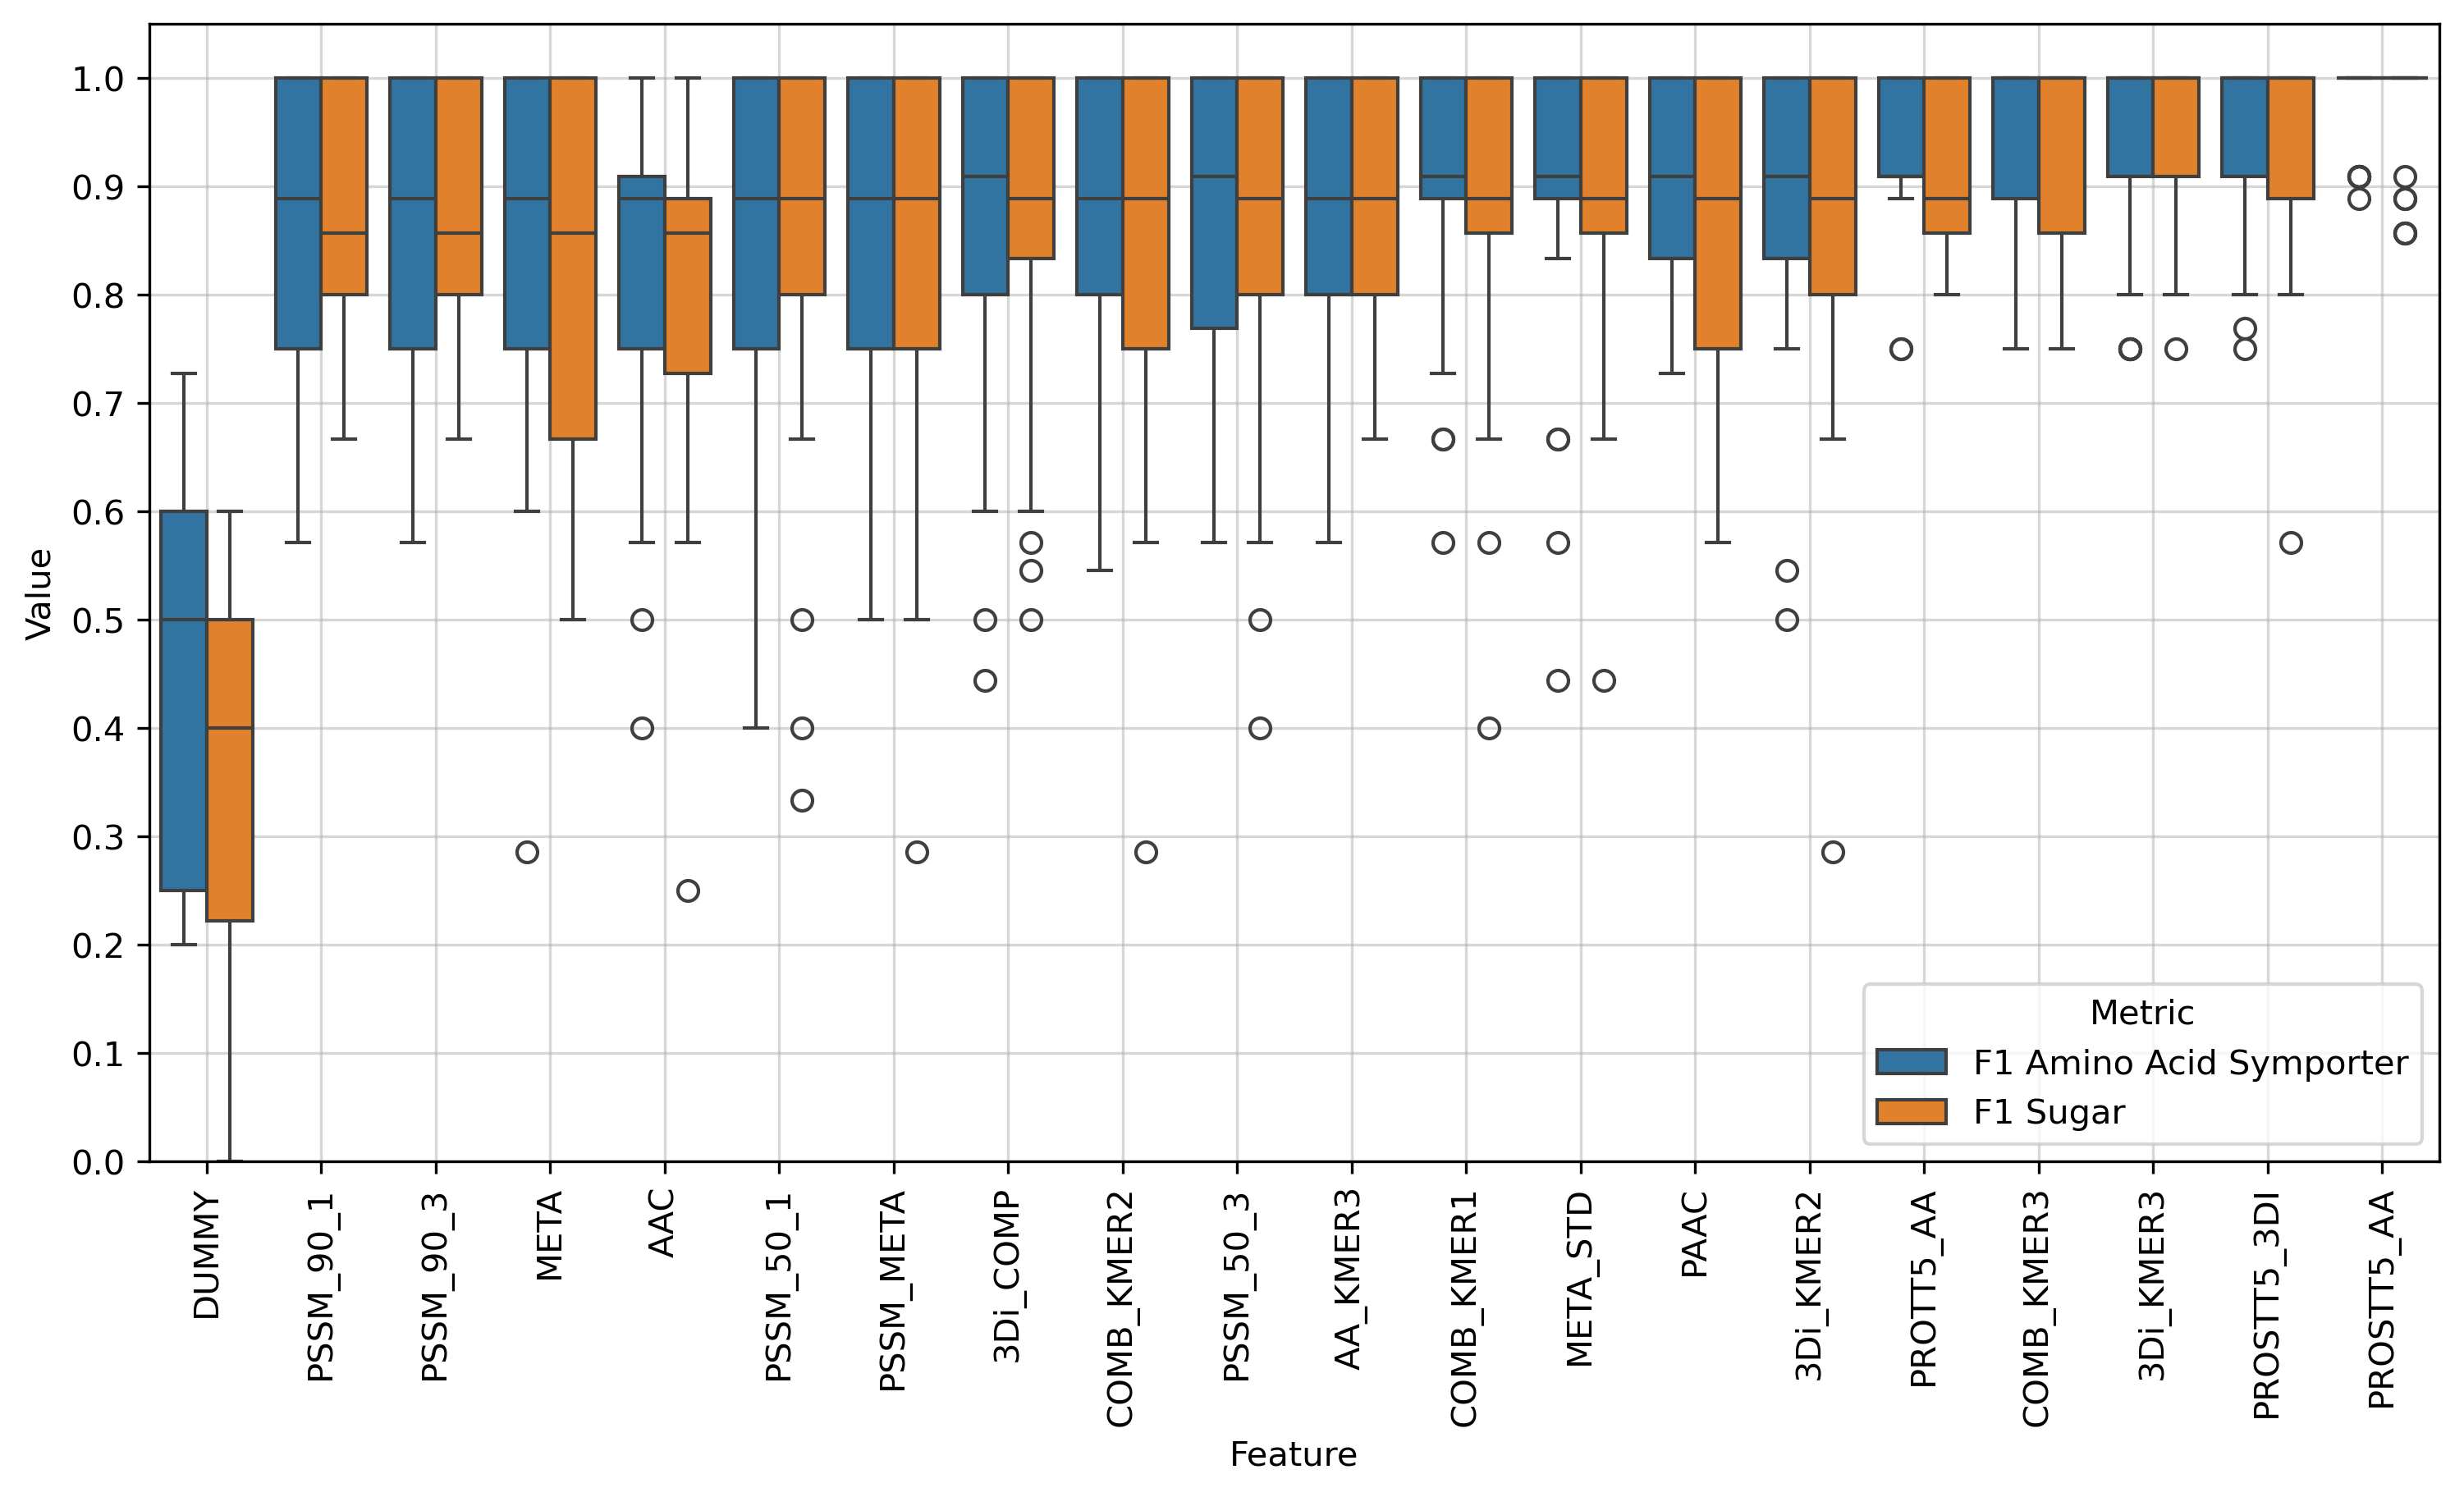

In [19]:
plot_results_long(
    df_results_long=df_results_long,
    output_folder_path=RESULTS_FOLDER,
    test_name=TEST_NAME,
    metrics_include = ["F1 Amino Acid Symporter","F1 Sugar"]
)

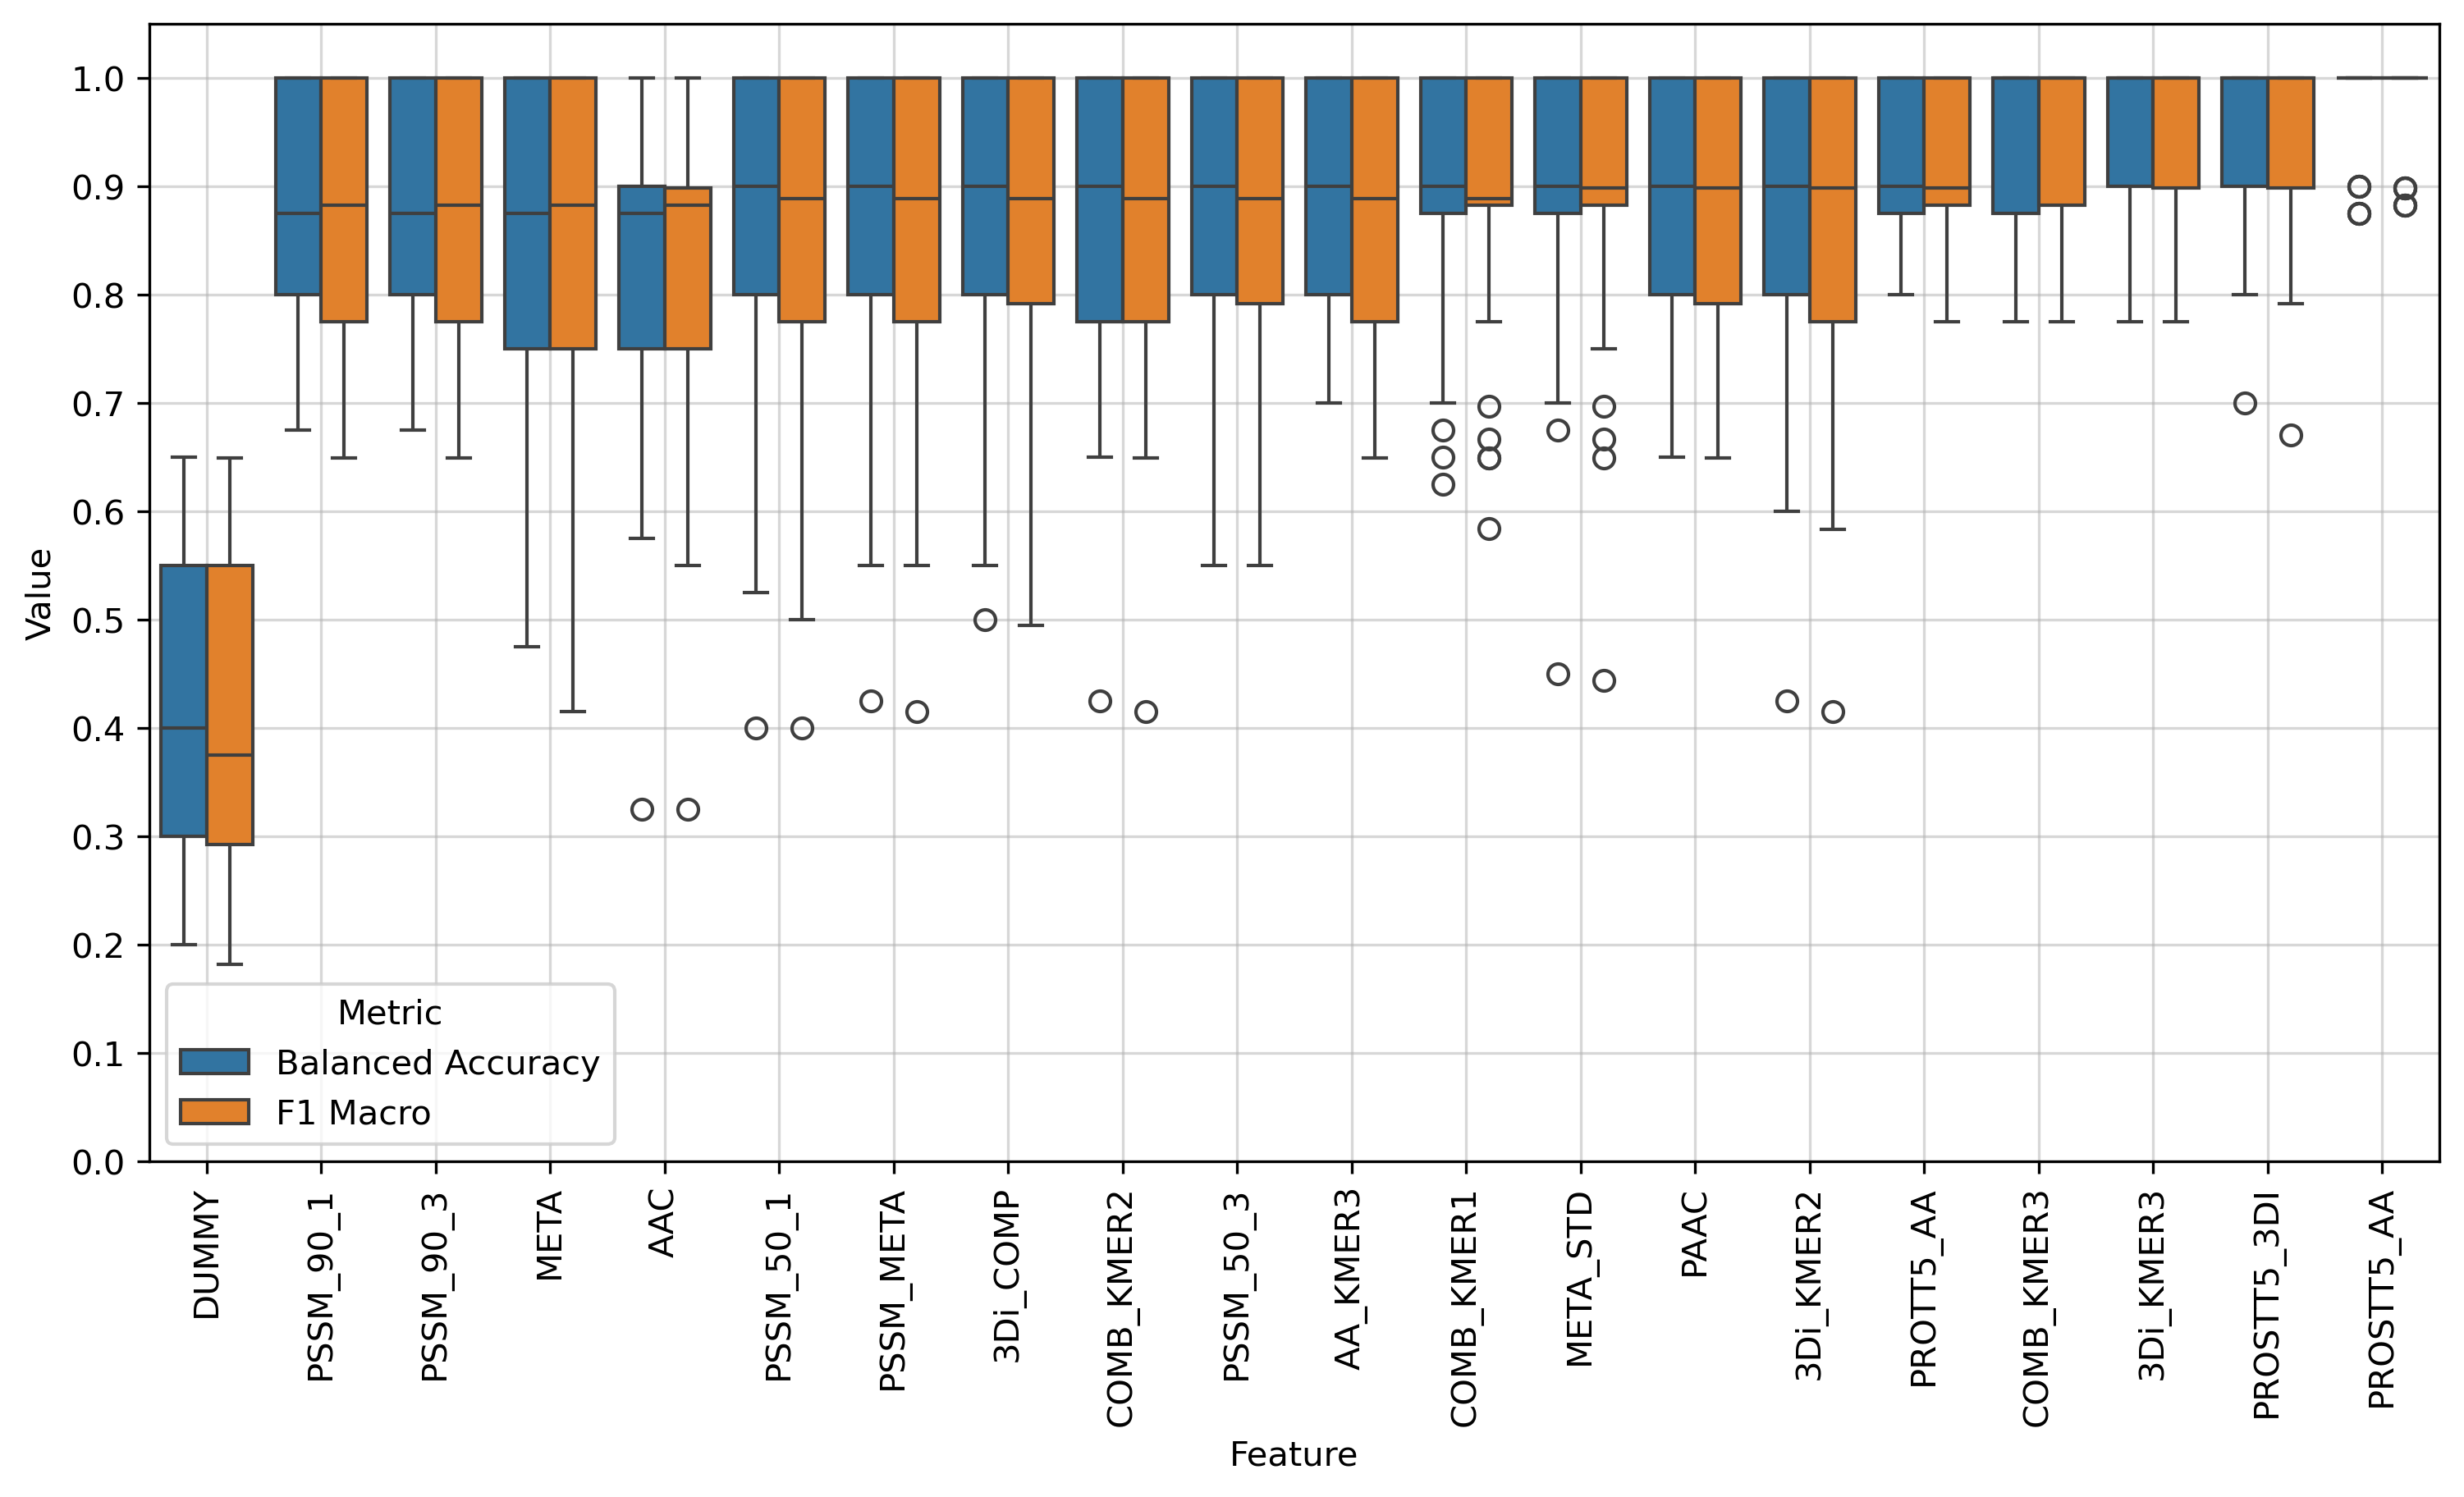

In [20]:
plot_results_long(
    df_results_long=df_results_long,
    output_folder_path=RESULTS_FOLDER,
    test_name=TEST_NAME,
    metrics_include = ["F1 Macro", "Balanced Accuracy"]
)